In [2]:
file_path = "G:/Pro/ML-Ng" # All files about machine learning of Ng

# Programming Exercise 1: Linear Regression

## 1 Simple function

Applying a function to generate a 5x5 identity matrix.

In [3]:
import numpy as np

In [4]:
def warm_up_exercise(n=5):
    # returns the 5x5 identity matrix
    """
    A = [[0]*n for _ in range(n)]
    for i in range(n):
        print(A[i])
        A[i][i] = 1
    """    
    # 2nd method:
    ## A = np.identity(n)
    A = np.eye(n)
    
    return A

def list_2d_error(n=5):
    a = [0]*n # [0,0,0,0,0]
    A = [a]*n 
    # 表示5个指向a的引用，即5个list的浅拷贝的连接
    # 真正有内存的只是a，A是5个指针内容的连接，这5个指针指向a
    # 则修改任何一个元素会修改整个列表
    print(A)
    print("Assigning:")
    A[0][0] = 1 
    # 结果是修改a[0]=1，由于是5个指向a的引用，故修改后A的第一列均为0
    print(A)

In [5]:
warm_up_exercise()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

**datasets**
- ex1data1.txt: Dataset for linear regression with `one` variable
- ex1data2.txt: Dataset for linear regression with `multiple` variables


## 2 Linear regression with one variable

Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.

You would like to use this data to help you select which city to expand
to next.

The file `ex1data1.txt` contains the dataset for our problem. The first column is the **population of a city** and the second column is the **profit of a food truck** in that city. A negative value for profit indicates a loss.

### 2.1 Loading and visualizing data

Before starting on any task, it is often useful to understand the data by
**visualizing** it.

In [6]:
import pandas as pd

In [7]:
# Firstly, read data from ex1data1.txt
pro_path = "/machine-learning-ex1/ex1/"
data = pd.read_csv(file_path+pro_path+'ex1data1.txt',names=['population','profits'])
data.head(3)

,population,profits
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
population    97 non-null float64
profits       97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


In [9]:
x = np.array(data.population) # x refers to the population size in 10,000s
y = np.array(data.profits) # y refers to the profit in $10,000s

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

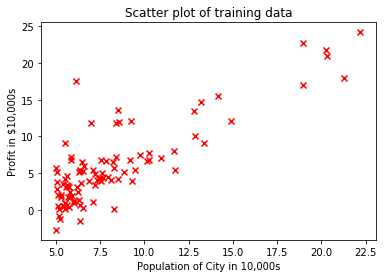

In [11]:
# plot the data
plt.scatter(x,y,marker='x',c='red')
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.title('Scatter plot of training data')
plt.show()

### 2.2 Gradient Descent

In this part, you will fit the linear regression parameters $\theta$ to our dataset using gradient descent.

The objective of linear regression is to minimize the cost function
$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h(x^i)-y^i)^2
$$

where $h(x)$ is  given by the linear model
$$
h(x) = \theta^T x = \theta_0 + \theta_1 x_1
$$

We store each example as a row in $X$ matrix.

In [12]:
x_train = np.append(np.ones((data.shape[0],1)),x[:,np.newaxis],axis=1) 
# Add a column of ones to accommodate the theta_0
# x_train: shape of (examples,features),features includes 1 for theta_0
x_train[:3]

array([[1.    , 6.1101],
       [1.    , 5.5277],
       [1.    , 8.5186]])

In [13]:
theta = np.zeros((2,)) # Initializing parameters
theta

array([0., 0.])

**1. computing the cost function**

As you perform gradient descent to minimize cost function $J(\theta)$,it is helpful to **monitor the convergence by computing the cost**. 

The variables x and y are matrices whose rows represent the examples.

In [14]:
def compute_cost(x,y,theta):
    
    m = np.dot(x,theta).reshape(-1,)-y
    cost = np.dot(m.T,m)/(2*len(y))
    
    return round(cost,2)

In [15]:
print("Testing the cost function ...")
cost = compute_cost(x_train,y,theta)
print('With theta = [0 ; 0]\nCost computed = %.2f\n'% cost)
cost = compute_cost(x_train,y,[-1,2])
print('With theta = [-1; 2]\nCost computed = %.2f\n'% cost)

Testing the cost function ...
With theta = [0 ; 0]
Cost computed = 32.07

With theta = [-1; 2]
Cost computed = 54.24



**2. Gradient descent**

Keep in mind that the cost $J(\theta)$ is parameterized by the vector $\theta$, not x and y.

A good way to verify that gradient descent is working correctly is to look at the value of $J(\theta)$ and check that it is decreasing with each step.

In [16]:
def gradient_descent(x,y,theta,learning_rate,num_iters):
    m = len(y) # number of examples
    cost_history = np.zeros(num_iters)
    for i in range(num_iters):
        cost_history[i] = compute_cost(x,y,theta)
        h = np.dot(x,theta).reshape(-1,) - y
        theta = theta - learning_rate*np.dot(x.T,h/m)
    return theta,cost_history

In [17]:
print("Running Gradient Descent ...")
iterations = 1500
alpha = 0.01 # learning rate
optimal_theta,cost_history = gradient_descent(x_train,y,theta,alpha,iterations)
print("Theta found by gradient descent:")
print(optimal_theta)

Running Gradient Descent ...
Theta found by gradient descent:
[-3.63029144  1.16636235]


**3. Visualizing training loss**

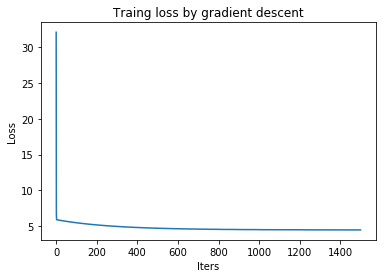

In [18]:
plt.plot(range(iterations),cost_history)
plt.xlabel("Iters")
plt.ylabel("Loss")
plt.title("Traing loss by gradient descent")
plt.show()

**4. Visualizing linear regression**

We will use your final parameters to plot the linear fit.

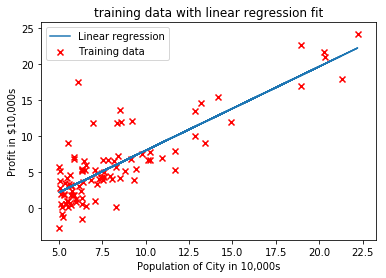

In [19]:
plt.plot(data.population,np.dot(x_train,optimal_theta),label="Linear regression")
plt.scatter(x,y,marker='x',c='red',label="Training data")
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.title('training data with linear regression fit')
plt.legend()
plt.show()

**5. Predictiton**

Our final parameters will also be used to predict profits in areas of 35,000 and 70,000 people.

In [20]:
# predict profits for 35,000 and 70,000 people.
np.dot([[1,3.5],[1,7]],optimal_theta) 

array([0.45197679, 4.53424501])

### 2.3 Debugging

-  If there are errors at runtime, inspect matrix operations to make sure that you’re adding and multiplying matrices of `compatible dimensions`. Printing the dimensions of variables.

### 2.4 Visualizing $J(\theta)$

To understand the cost function $J(\theta)$ better, you will now plot the cost over a 2-dimensional grid of $\theta_0$ and $\theta_1$ values.

In [21]:
print("Visualizing loss with respect to parameters ...")
theta0_vals = np.arange(-10,12,2)
theta1_vals = np.arange(-1,4.5,0.5)
print(len(theta0_vals),len(theta1_vals))

Visualizing loss with respect to parameters ...
11 11


In [22]:
J_vals = np.zeros((len(theta0_vals),len(theta1_vals)))
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = [theta0_vals[i],theta1_vals[j]]
        J_vals[i][j] = compute_cost(x_train,y,t)
print(J_vals.shape)

(11, 11)


In [23]:
theta0_vals,theta1_vals = np.meshgrid(theta0_vals,theta1_vals)
print(theta0_vals.shape,theta1_vals.shape)

(11, 11) (11, 11)


In [24]:
from mpl_toolkits.mplot3d import Axes3D

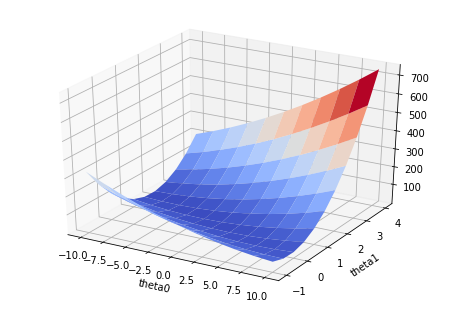

In [25]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(theta0_vals, theta1_vals, J_vals.T,cmap = plt.cm.coolwarm)
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.show()

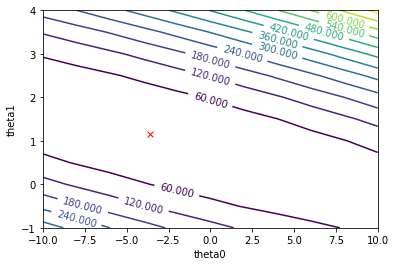

In [26]:
# 填充颜色
# plt.contourf(theta0_vals,theta1_vals,J_vals.T,np.logspace(-2, 3, 20))
# 绘制等高线
C = plt.contour(theta0_vals,theta1_vals,J_vals.T,12,cmap=plt.cm.viridis)
# 显示各等高线的数据标签
plt.clabel(C,inline = True,fontsize=10)
plt.xlabel("theta0")
plt.ylabel("theta1")
plt.plot(optimal_theta[0],optimal_theta[1],marker='x',c='red')
# theta for minimimal loss
plt.show()

The cost function $J(\theta)$ is bowl-shaped and has a global
mininum.

## 3 Linear regression with multiple variables

Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

The file `ex1data2.txt` contains a training set of housing prices in Portland, Oregon. The first column is the `size` of the house (in square feet), the second column is `the number of bedrooms`, and the third column is `the price of the house`.

In [27]:
data_m = pd.read_csv(file_path+pro_path+'ex1data2.txt',\
                     names=['size','bed_num','price'])
data_m.head(3)

,size,bed_num,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000


In [28]:
data_m.describe()

,size,bed_num,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [29]:
x_train = np.array(data_m[['size','bed_num']])
x_train.shape

(47, 2)

In [30]:
y_train = np.array(data_m['price'])
y_train.shape

(47,)

### 3.1 Feature Normalization

We note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make **gradient descent converge much more quickly**.

- subtract mean value
- divide standard deviations

The standard deviation is to measure how much variation there is
in the range of values of a feature; this is an alternative to taking the range of values (max-min).

We will do this for all the features.

**Implementation Note:**

When normalizing the features, it is important to store the values used for normalization - the mean value and the standard deviation used for the computations. 

After learning the parameters from the model, we often want to predict new examples. Given a new x value, we must first normalize x using the mean and standard deviation that we had previously computed **from the training set**.

In [31]:
def feature_normalize(x):
    # subtract mean value and divide standard deviations
    mean_v = np.mean(x,axis=0)
    std_v = np.std(x,axis=0)
    norm_x = (x-mean_v)/std_v
    
    return mean_v,std_v,norm_x

In [32]:
print("Features normalization ...")
mean_train,std_train,x_norm = feature_normalize(x_train)
print(mean_train,std_train,x_norm.shape)

Features normalization ...
[2000.68085106    3.17021277] [7.86202619e+02 7.52842809e-01] (47, 2)


In [33]:
x_norm[:5]

array([[ 0.13141542, -0.22609337],
       [-0.5096407 , -0.22609337],
       [ 0.5079087 , -0.22609337],
       [-0.74367706, -1.5543919 ],
       [ 1.27107075,  1.10220517]])

In [34]:
# Add intercept term to X
x_norm = np.concatenate((np.ones((len(y_train),1)),x_norm),axis=1)

In [35]:
x_norm.shape

(47, 3)

### 3.2 Gradient Descent

The functions of compute_cost and gradient_descent same as on a univariate regression.

**1. Choosing apporiate learning rate**

We will get to try out different learning rates and find a learning rate that converges quickly(about 50 iterations).

If your learning rate is too large, loss can diverge and ‘blow up’, resulting in values which are too large for computer calculations. 

These situations will tend to returnNaNs. **NaN** stands for ‘not a number’ and is often caused by undefined operations that involve $+\infty$ and $-\infty$.

In [36]:
theta_m = np.zeros(3)
theta_m

array([0., 0., 0.])

Choosing best learning rate ...
Theta found on 0.01:
[338175.984, 103032.1243, -202.3252]
Theta found on 0.03:
[340412.5768, 109372.3081, -6502.8665]
Theta found on 0.1:
[340412.6596, 109447.7965, -6578.3548]
Theta found on 0.3:
[340412.6596, 109447.7965, -6578.3549]
Theta found on 1:
[340412.6596, 109447.7965, -6578.3549]


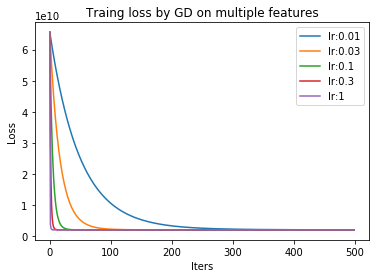

In [37]:
print("Choosing best learning rate ...")
iterations = 500
for alpha in [0.01,0.03,0.1,0.3,1]:
    thetam,cost_history = gradient_descent(x_norm,y_train,theta_m,alpha,iterations)
    thetam = [round(each,4) for each in thetam]
    print("Theta found on %s:" % str(alpha))
    print(thetam)
    plt.plot(range(iterations),cost_history,label='lr:'+str(alpha))
plt.xlabel("Iters")
plt.ylabel("Loss")
plt.title("Traing loss by GD on multiple features")
plt.legend()
plt.show()

With a small learning rate, you should find that gradient descent takes a very long time to converge to the optimal value. Conversely, with a large learning rate, gradient descent might not converge or might even diverge!

Retraining model on best learning rate ...
Theta found by gradient descent:
[338658.2492, 103322.8294, -474.7425]


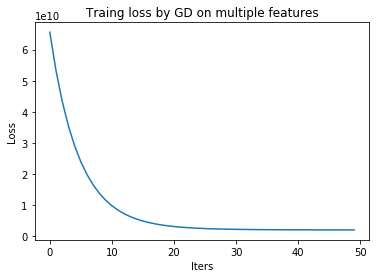

In [47]:
# The best learning rate is 0.1

print("Retraining model on best learning rate ...")
iterations = 50
alpha = 0.1
opt_thetam,cost_history = gradient_descent(x_norm,y_train,theta_m,alpha,iterations)
opt_thetam = [round(each,4) for each in opt_thetam]
print("Theta found by gradient descent:")
print(opt_thetam)

plt.plot(range(iterations),cost_history)
plt.xlabel("Iters")
plt.ylabel("Loss")
plt.title("Traing loss by GD on multiple features")
plt.show()

**2. Predicting price for new house.**

Use this parameter to predict the price of a house with 1650 square feet and 3 bedrooms.

In [48]:
new_x = [1650,3]
new_x = (new_x-mean_train)/std_train
new_x = np.append([1],new_x)
new_x

array([ 1.        , -0.44604386, -0.22609337])

In [49]:
gd_price = round(np.dot(new_x,opt_thetam),4)
print("Predicted price of a 1650 sq-ft, 3 br house :%.4f" % gd_price)

Predicted price of a 1650 sq-ft, 3 br house :292679.0716


### 3.3 Normal Equations

$$
\theta = (X^T X)^{-1}X^TY
$$

Using this formula does not require any feature scaling.We still
need to add a column of 1’s to the X matrix to have an intercept term.

In [41]:
def normal_eqn(x,y):
    f = np.linalg.inv(np.dot(x.T,x))
    theta = np.dot(np.dot(f,x.T),y)
    return theta

In [42]:
x_normeq = np.concatenate((np.ones((len(y_train),1)),x_train),axis=1)
theta_norm = normal_eqn(x_normeq,y_train)

In [43]:
theta_norm

array([89597.9095428 ,   139.21067402, -8738.01911233])

In [50]:
new_x = [1650,3]
new_x = np.append([1],new_x)
print(new_x)
norm_price = round(np.dot(new_x,theta_norm),4)
print("Predicted price of a 1650 sq-ft, 3 br house by norm eaquation:%.4f" % norm_price)

[   1 1650    3]
Predicted price of a 1650 sq-ft, 3 br house by norm eaquation:293081.4643


We should get the same predicted price as the value you obtained using the model fit with gradient descent

In [51]:
gd_price,norm_price

(292679.0716, 293081.4643)